In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the sequential model
model_custom = Sequential()

# First convolutional layer
model_custom.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model_custom.add(BatchNormalization())
model_custom.add(MaxPooling2D(pool_size=(2, 2)))
model_custom.add(Dropout(0.25))

# Second convolutional layer
model_custom.add(Conv2D(64, (3, 3), activation='relu'))
model_custom.add(BatchNormalization())
model_custom.add(MaxPooling2D(pool_size=(2, 2)))
model_custom.add(Dropout(0.25))

# Third convolutional layer
model_custom.add(Conv2D(128, (3, 3), activation='relu'))
model_custom.add(BatchNormalization())
model_custom.add(MaxPooling2D(pool_size=(2, 2)))
model_custom.add(Dropout(0.25))

# Fourth convolutional layer
model_custom.add(Conv2D(128, (3, 3), activation='relu'))
model_custom.add(BatchNormalization())
model_custom.add(MaxPooling2D(pool_size=(2, 2)))
model_custom.add(Dropout(0.25))

# Fifth convolutional layer
model_custom.add(Conv2D(256, (3, 3), activation='relu'))
model_custom.add(BatchNormalization())
model_custom.add(MaxPooling2D(pool_size=(2, 2)))
model_custom.add(Dropout(0.25))

# Global average pooling
model_custom.add(GlobalAveragePooling2D())

# Dense layers
model_custom.add(Dense(256, activation='relu'))
model_custom.add(Dropout(0.5))
model_custom.add(Dense(128, activation='relu'))
model_custom.add(Dropout(0.5))
model_custom.add(Dense(3, activation='softmax'))

# Compile the model

compilation= model_custom.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','confusion_metics'])

# Summary of the model
model_custom.summary()

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5, 1.3],
    fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training, validation, and test datasets
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/potato_leaf_disease_classification/Train', target_size=(256, 256), batch_size=16, class_mode='categorical',color_mode="rgb")
validation_set = val_datagen.flow_from_directory('/content/drive/MyDrive/potato_leaf_disease_classification/Validation', target_size=(256, 256), batch_size=16, class_mode='categorical',color_mode="rgb")
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/potato_leaf_disease_classification/Test', target_size=(256, 256), batch_size=16, class_mode='categorical',color_mode="rgb")

# Train the model
history = model_custom.fit(training_set, steps_per_epoch=20, epochs=50, validation_data=validation_set, validation_steps=20)

# Evaluate the model
# Evaluate the model on the test set


# Print the results
#print("\n\n")
#print("Test Loss: \t", test_loss, "\n")
#print("Test Accuracy: \t", test_acc, "\n")
#print("Test Precision: \t", test_precision, "\n")
#print("Test Recall: \t", test_recall, "\n")
#print("Test F1 Score: \t", test_f1, "\n")
test_loss, test_acc = model_custom.evaluate(test_set, verbose=2)
print("\n\n")
print("Test Loss: \t", test_loss, "\n")
print("Test Accuracy: \t", test_acc, "\n")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │              

 Total params: 637,507 (2.43 MB)

 Trainable params: 636,291 (2.43 MB)

 Non-trainable params: 1,216 (4.75 KB)

Found 1292 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 218s 9s/step - accuracy: 0.5147 - loss: 1.2894 - val_accuracy: 0.4688 - val_loss: 0.9183
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.6165 - loss: 0.8936 - val_accuracy: 0.4364 - val_loss: 1.0518
Epoch 3/50
 2/20 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7031 - loss: 0.8410

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.6619 - loss: 0.7696 - val_accuracy: 0.4688 - val_loss: 1.2096
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 795ms/step - accuracy: 0.7231 - loss: 0.6449 - val_accuracy: 0.5091 - val_loss: 3.1517
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 254ms/step - accuracy: 0.8750 - loss: 0.3682 - val_accuracy: 0.4500 - val_loss: 3.6323
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8147 - loss: 0.4722 - val_accuracy: 0.3636 - val_loss: 1.8527
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7787 - loss: 0.6037 - val_accuracy: 0.4187 - val_loss: 1.9299
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 771ms/step - accuracy: 0.8299 - loss: 0.4404 - val_accuracy: 0.4000 - val_loss: 1.6494
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 615ms/step - accuracy: 0.7946 - loss: 0.5422 - val_accuracy: 0.4750 - val_loss: 1.6734
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8125 - loss: 0.4226 - val_accuracy: 0.4091 - val_los

In [ ]:
y_pred = model_custom.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_set.classes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step
Confusion Matrix:
 [[117  68  15]
 [115  75  10]
 [  8  19   3]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model_custom.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_set.classes
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)
report = classification_report(y_true, y_pred_classes, target_names=test_set.class_indices.keys())
print("Classification Report:\n", report)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step
Confusion Matrix:
 [[109  70  21]
 [113  80   7]
 [ 18  12   0]]
Classification Report:
                        precision    recall  f1-score   support

Potato___Early_blight       0.45      0.55      0.50       200
 Potato___Late_blight       0.49      0.40      0.44       200
     Potato___healthy       0.00      0.00      0.00        30

             accuracy                           0.44       430
            macro avg       0.32      0.32      0.31       430
         weighted avg       0.44      0.44      0.44       430



In [ ]:
results = model_custom.evaluate(test_set, verbose=2)

# Extract loss and accuracy
test_loss = results[0]
test_acc = results[1]

# Predict probabilities for the test set
y_pred_proba = model_custom.predict(test_set)

# Get predicted classes
y_pred = np.argmax(y_pred_proba, axis=1)

# Get true classes
y_true = test_set.classes

# Calculate precision, recall, and F1-score
# Note: 'macro' average calculates metrics globally by considering each class independently
from sklearn.metrics import precision_score, recall_score, f1_score # Import necessary metrics
test_precision = precision_score(y_true, y_pred, average='macro')
test_recall = recall_score(y_true, y_pred, average='macro')
test_f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("\n\n")
print("Test Loss: \t", test_loss, "\n")
print("Test Accuracy: \t", test_acc, "\n")
print("Test Precision: \t", test_precision, "\n")
print("Test Recall: \t", test_recall, "\n")
print("Test F1 Score: \t", test_f1, "\n")


27/27 - 2s - 68ms/step - accuracy: 0.8744 - loss: 0.3023
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step



Test Loss: 	 0.30227696895599365 

Test Accuracy: 	 0.8744186162948608 

Test Precision: 	 0.33628747795414465 

Test Recall: 	 0.3377777777777778 

Test F1 Score: 	 0.33392854050122106 



In [ ]:
pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


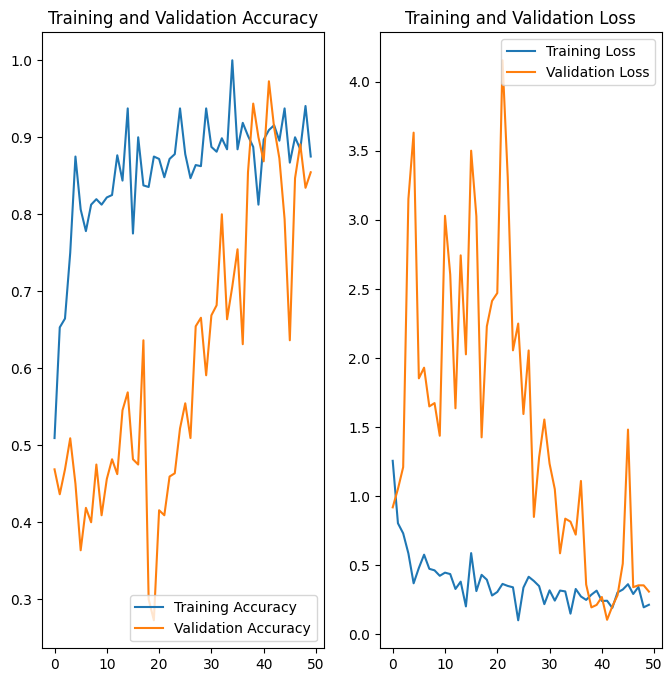

In [ ]:
from matplotlib import pyplot as plt
EPOCHS = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model_custom.save('final_model.h5')

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image

# Load and preprocess the test image
test_image = image.load_img('/content/drive/MyDrive/Potato_Healthy.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class of the test image
result = model_custom.predict(test_image)
print(result)

# Assuming the class indices mapping
# training_set.class_indices will return a dictionary like {'class1': 0, 'class2': 1, 'class3': 2}
class_indices = training_set.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Reverse the dictionary to get labels from indices

# Get the predicted class index
predicted_class_index = np.argmax(result, axis=1)[0]
prediction = class_labels[predicted_class_index]

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.0000000e+00 1.0000000e+00 1.2121233e-18]]
Potato___Late_blight


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image

# Load and preprocess the test image
test_image = image.load_img('/content/drive/MyDrive/test_potato_early_blight.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class of the test image
result = model_custom.predict(test_image)
print(result)

# Assuming the class indices mapping
# training_set.class_indices will return a dictionary like {'class1': 0, 'class2': 1, 'class3': 2}
class_indices = training_set.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Reverse the dictionary to get labels from indices

# Get the predicted class index
predicted_class_index = np.argmax(result, axis=1)[0]
prediction = class_labels[predicted_class_index]

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.0000000e+00 5.5072677e-25 0.0000000e+00]]
Potato___Early_blight
